In [66]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import sklearn

In [6]:
keras.__version__

'2.5.0'

In [7]:
tf.__version__

'2.5.0'

In [4]:
from tensorflow.keras.datasets import mnist

In [5]:
# import sys

# sys.path.insert(0 , r'fashion-mnist-master\fashion-mnist-master\utils')

import mnist_reader

In [6]:
(X_train), (y_train) = mnist_reader.load_mnist(r'fashion-mnist-master\fashion-mnist-master\data\fashion', kind='train')
(X_test), (y_test) = mnist_reader.load_mnist(r'fashion-mnist-master\fashion-mnist-master\data\fashion', kind='t10k')

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [17]:
X_train.shape

(60000, 784)

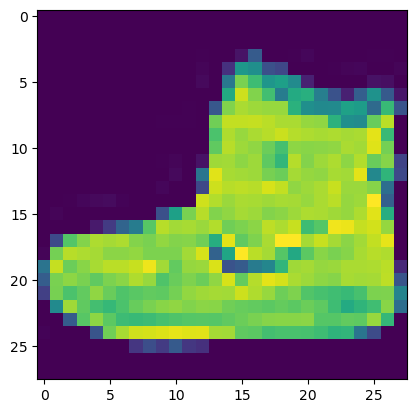

In [18]:
plt.imshow(X_train.reshape(60000,28,28)[0])
plt.show()

In [27]:
X_train = X_train.reshape(60000,28,28)
X_test = X_test.reshape(10000,28,28)

In [28]:
Y_train = y_train.copy()
Y_test = y_test.copy()

In [9]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

class_names[Y_Train[0]]

'Ankle boot'

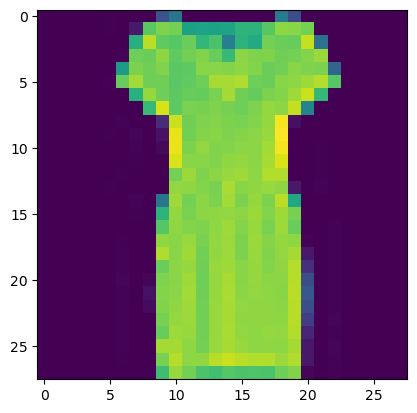

In [29]:
plt.imshow(X_train[20])
plt.show()

In [30]:
class_names[Y_train[20]]

'Dress'

## Data Normalistion

### we normalise the data dimensions so that they are of approx the same scale

In [31]:
X_train = X_train /255.0
X_test = X_test /255.0

In [32]:
X_train[0][10]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.75686275, 0.89411765,
       0.85490196, 0.83529412, 0.77647059, 0.70588235, 0.83137255,
       0.82352941, 0.82745098, 0.83529412, 0.8745098 , 0.8627451 ,
       0.95294118, 0.79215686, 0.        ])

In [33]:
X_Valid , X_Train = X_train[:5000] , X_train[5000:]
Y_Valid , Y_Train = Y_train[:5000] , Y_train[5000:]

In [34]:
print('X Train: ' , X_Train.shape)
print('Y Train: ' , Y_Train.shape)
print('X Valid: ' , X_Valid.shape)
print('Y Valid: ' , Y_Valid.shape)
print('X Test: ' , X_Test.shape)
print('Y Test: ' , Y_Test.shape)

X Train:  (55000, 28, 28)
Y Train:  (55000,)
X Valid:  (5000, 28, 28)
Y Valid:  (5000,)
X Test:  (10000, 28, 28)
Y Test:  (10000,)


# Create Model
* ### Sequential API = straight frward and simple
* ### Functional API = little complex , but flexible to comples neural networks

In [44]:
np.random.seed(4)
tf.random.set_seed(4)

### ReLU is 0 for all -ve numbers & equal to input for all +ve number
### Softmax equates the sum of all the class probability to 1

In [45]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))   # Input Layer
model.add(keras.layers.Dense(300 , activation = 'relu'))  # Hidden Layer
model.add(keras.layers.Dense(100 , activation = 'relu'))  # Hidden Layer
model.add(keras.layers.Dense(10 , activation = 'softmax'))  # Output Layer.....softmax for multiclass classfication

In [46]:
model.summary()   # None means no limit on input data.....trainable parameters for each layer

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_13 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


#### (784x300) + (300...baised values in neuron) .......  (300x100) + 100

### Visualise Neural Network

In [ ]:
import pydot

In [19]:
keras.utils.plot_model(model)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [37]:
weights , biases = model.layers[1].get_weights()

In [38]:
weights

array([[-0.00958908,  0.00369985, -0.00048406, ..., -0.07357587,
        -0.02742664, -0.04121105],
       [ 0.06529447, -0.07138363,  0.05846708, ..., -0.0041897 ,
         0.06529114, -0.03365361],
       [ 0.05264154, -0.03162553,  0.01164634, ..., -0.04076129,
         0.01914155, -0.03140609],
       ...,
       [ 0.0286293 ,  0.03434967, -0.00212682, ..., -0.0253939 ,
         0.06216036,  0.01375941],
       [ 0.00351328,  0.05891068, -0.01023991, ...,  0.05314083,
        -0.06726155,  0.07313393],
       [-0.00130923,  0.045985  ,  0.04936647, ...,  0.02184285,
        -0.01658475,  0.06170258]], dtype=float32)

In [22]:
weights.shape

(784, 300)

In [52]:
biases.shape

(300,)

## Compiling Model

In [47]:
model.compile(loss = 'sparse_categorical_crossentropy', #loss function = cross entropy,for binary classify = binary_crossentropy
             optimizer = 'sgd',                          # stochastic gradient descent optimizer
             metrics = ['accuracy'])                     

In [51]:
X_Train.shape , X_train.shape , Y_Train.shape , Y_train.shape , X_Valid.shape , Y_Valid.shape

((55000, 28, 28), (60000, 28, 28), (55000,), (60000,), (5000, 28, 28), (5000,))

In [52]:
model_history = model.fit(X_train , Y_train , epochs = 30 , validation_data = (X_Valid , Y_Valid))

Epoch 1/30
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2321 - accuracy: 0.9161 - val_loss: 0.2815 - val_accuracy: 0.8984
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2277 - accuracy: 0.9184 - val_loss: 0.2633 - val_accuracy: 0.9038
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2230 - accuracy: 0.9207 - val_loss: 0.2643 - val_accuracy: 0.9022
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2204 - accuracy: 0.9210 - val_loss: 0.2520 - val_accuracy: 0.9090
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2163 - accuracy: 0.9220 - val_loss: 0.2565 - val_accuracy: 0.9074
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2135 - accuracy: 0.9234 - val_loss: 0.2445 - val_accuracy: 0.9106
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2093 - accuracy: 0.9259 - val_loss: 0.2298 - val_accuracy:

In [53]:
model.history.params   # verbose should be 0

{'verbose': 1, 'epochs': 30, 'steps': 1875}

In [63]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

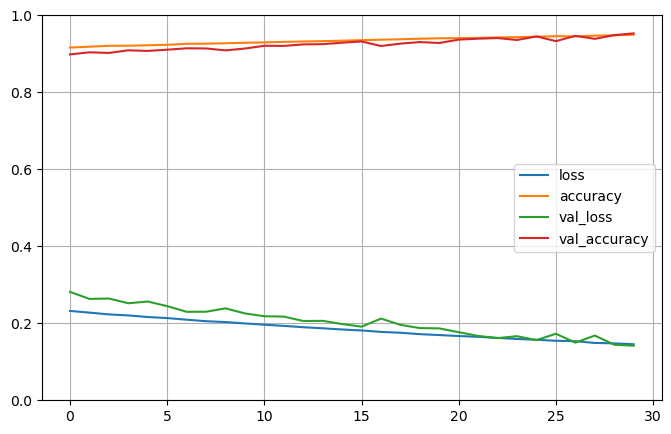

In [55]:
pd.DataFrame(model.history.history).plot(figsize = (8,5))
plt.grid(True)
plt.ylim(0,1)
plt.show()

### Model is not coverged yet....if again fitted....the new model will start from old model last point....it means old models 30 epoch + this new models 50 epochs

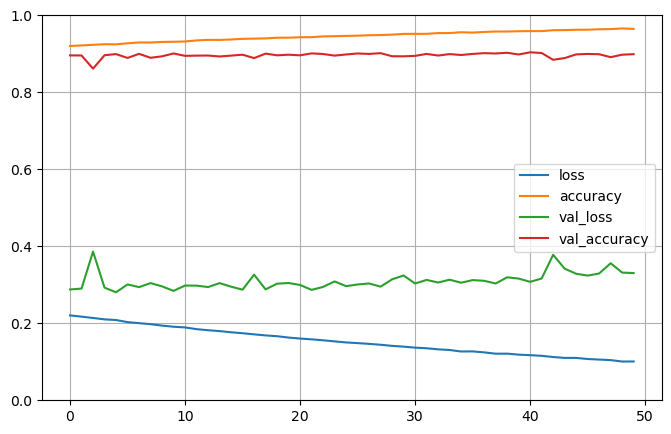

In [65]:
model_history = model.fit(X_Train , Y_Train , epochs = 50 , validation_data = (X_Valid , Y_Valid) , verbose = 0)

pd.DataFrame(model.history.history).plot(figsize = (8,5))
plt.grid(True)
plt.ylim(0,1)
plt.show()

### Graph started from the end of last epochs graph

# Predicting & Evaluating

In [66]:
model.evaluate(X_Test , Y_Test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3687 - accuracy: 0.8892


[0.3687297999858856, 0.88919997215271]

In [69]:
X_New = X_Test[:3]

In [70]:
Y_Prob = model.predict(X_New)
Y_Prob.round(2)    # Probability Score For All Classes

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [71]:
Y_Pred = model.predict_classes(X_New)
Y_Pred

D:\Anaconda\envs\myenv\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1], dtype=int64)

In [72]:
np.array(class_names)[Y_Pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [73]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

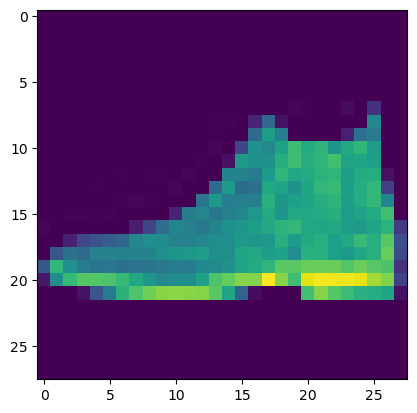

In [74]:
plt.imshow(X_Test[0])
plt.show()

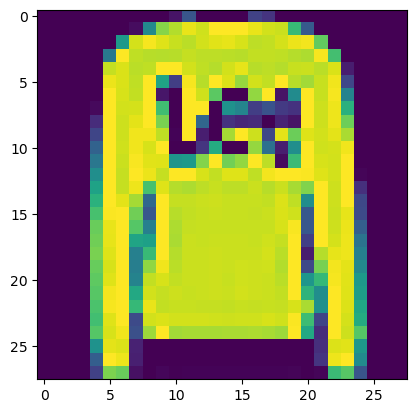

In [75]:
plt.imshow(X_Test[1])
plt.show()

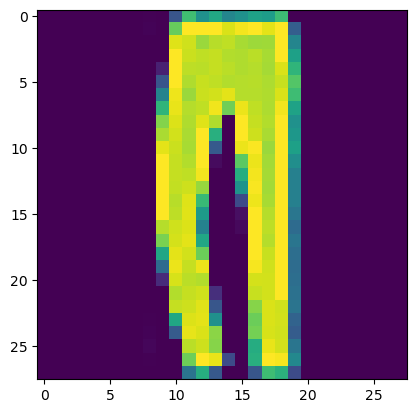

In [76]:
plt.imshow(X_Test[2])
plt.show()

In [62]:
X_train.shape , X_Valid.shape

((60000, 28, 28), (5000, 28, 28))

In [63]:
X = X_train.reshape(60000 , 28*28)
X_V = X_Valid.reshape(5000 , 28*28)
X.shape , X_V.shape

((60000, 784), (5000, 784))

In [64]:
# This time we are using already flattened data

model = keras.models.Sequential()
# model.add(keras.layers.Flatten(input_shape = [28,28]))   # Input Layer
model.add(keras.layers.InputLayer(input_shape = (784,)))
model.add(keras.layers.Dense(300 , activation = 'relu'))  # Hidden Layer
model.add(keras.layers.Dense(100 , activation = 'relu'))  # Hidden Layer
model.add(keras.layers.Dense(10 , activation = 'softmax'))  # Output Layer.....softmax for multiclass classfication

model.compile(loss = 'sparse_categorical_crossentropy', #loss function = cross entropy,for binary classify = binary_crossentropy
             optimizer = 'sgd',                          # stochastic gradient descent optimizer
             metrics = ['accuracy'])                     

model_history = model.fit(X , Y_train , epochs = 30 , validation_data = (X_V , Y_Valid))

Epoch 1/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7030 - accuracy: 0.7703 - val_loss: 0.4800 - val_accuracy: 0.8378
Epoch 2/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4810 - accuracy: 0.8312 - val_loss: 0.4370 - val_accuracy: 0.8478
Epoch 3/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4363 - accuracy: 0.8479 - val_loss: 0.3997 - val_accuracy: 0.8620
Epoch 4/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4102 - accuracy: 0.8560 - val_loss: 0.3702 - val_accuracy: 0.8736
Epoch 5/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3887 - accuracy: 0.8630 - val_loss: 0.3580 - val_accuracy: 0.8772
Epoch 6/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3733 - accuracy: 0.8685 - val_loss: 0.3538 - val_accuracy: 0.8798
Epoch 7/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3603 - accuracy: 0.8718 - val_loss: 0.3365 - val_accuracy:

In [69]:
X_Test = X_Test.reshape(10000 , 28*28)
X_Test.shape

(10000, 784)

In [70]:
X_New = X_Test[:3]

Y_Prob = model.predict(X_New)
Y_Prob.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [71]:
Y_Pred = model.predict_classes(X_New)
Y_Pred

D:\Anaconda\envs\myenv\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1], dtype=int64)

In [76]:
np.array(class_names)[Y_Pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

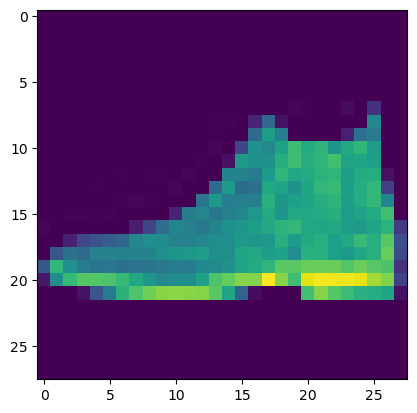

In [79]:
plt.imshow(X_Test[0].reshape(28,28))
plt.show()